# 1. Problema del sub-arreglo máximo

Se requiere encontrar un sub-arreglo continuo del arreglo principal que maximice la suma, esto es, que los elementos de dicho sub-arreglo sumen igual o más que el de cualquier otro sub-arreglo.

**Entrada**: Arreglo de números $[a_1, ..., a_n]$, con $n \in \mathbb{N}$.

**Salida**: Sub-arreglo $[A-i, .., a_j]$ tal que la suma de los elementos es mayor o igual a cualquier otro sub-arreglo, es decir, $\sum\limits_{k=i}^j a_k \geq \sum\limits_{k=i'}^{j'} a_k$ para cualquier par $(i', j')$, con $i' \leq j' \leq n$.

## 2. Implementación _MaxSubArrayMid_

Descripción del algoritmo:

Se divide _arr_ en la mitad. Luego, a partir del valor _mid_ (donde se divide el arreglo), un contador va disminuyendo en posiciones hacia la izquierda y otro va aumentando hacia la derecha. En el sub-arreglo de la izquierda se busca la posición que maximice la suma de dicho sub-arreglo. Lo mismo ocurre en el de la derecha. Al final, con ambas posiciones se forma el sub-arreglo que maximiza la suma y que pasa por _mid_.

In [1]:
def maxSubArrayMid(arr, l, m, h, verbose=False):
    left_sum = float('-inf')
    smL = 0
    cross_start = m

    for i in range(m-1, l-1, -1):
        smL = smL + arr[i]
        if (smL > left_sum):
            left_sum = smL
            cross_start = i
            if verbose:
                print("Sub-arreglo izquierdo:", arr[cross_start:m])
                print("Suma sub-arreglo izquierdo:", smL)
                print("Índice izquierdo:",cross_start)

    if verbose:
        print()
    right_sum = float('-inf')
    smR = 0
    cross_end = m + 1
    for i in range(m, h):
        smR = smR + arr[i]
        if (smR > right_sum):
            right_sum = smR
            cross_end = i + 1
            if verbose:
                print("Sub-arreglo derecho:", arr[m:cross_end])
                print("Suma sub-arreglo derecho:", smR)
                print("Índice derecho:", cross_end)

    return cross_start, cross_end, right_sum + left_sum

# 2. Implementación _MaxSubArray_

Descripción del algoritmo:

Este algoritmo compara 3 sub-arreglos: el de la izquierda de _mid_, el de la derecha y el que contiene _mid_. Retorna las posiciones de los elementos de inicio y término de el sub-arreglo con la mayor suma, además de dicha suma.

In [2]:
def maxSubArray(arr, l, h, verbose=False):
    if (l == h-1):
        return l, h, arr[l]

    m = (l + h) // 2

    left_start, left_end, left_max = maxSubArray(arr, l, m)
    right_start, right_end, right_max = maxSubArray(arr, m, h)
    cross_start, cross_end, cross_max = maxSubArrayMid(arr, l, m, h, verbose)

    if verbose:
        print("\nSub-arrego máximo:", arr[cross_start:cross_end])

    if(left_max > right_max and left_max > cross_max):
        if verbose:
            print("Índices sub-arreglo izquierdo:", left_start, left_end-1,
                  "\nSuma:", left_max)
        return left_start, left_end, left_max
    elif(right_max > left_max and right_max > cross_max):
        if verbose:
            print("Índices sub-arreglo derecho:", right_start, right_end-1,
                  "\nSuma:", right_max)
        return right_start, right_end, right_max
    else:
        if verbose:
            print("Índices sub-arreglo que pasa por mid:", cross_start,
                  cross_end-1, "\nSuma:", cross_max)
        return cross_start, cross_end, cross_max

In [3]:
import random
a = random.sample(range(-100, 101), 6)
print('Entrada:', a)
n = len(a)
start, end, max_sum = maxSubArray(a, 0, n)
print("Sub-arrego máximo:", a[start:end])
print("Índices:", start, " y ", end-1)

Entrada: [26, -100, -88, -23, -98, 71]
Sub-arrego máximo: [71]
Índices: 5  y  5


Ejemplo con `verbose=True`:

In [4]:
arr = [-1, 3, 4, -5, 9,-2]
n = len(arr)
start, end, max_sum = maxSubArray(arr, 0, n, True)

Sub-arreglo izquierdo: [4]
Suma sub-arreglo izquierdo: 4
Índice izquierdo: 2
Sub-arreglo izquierdo: [3, 4]
Suma sub-arreglo izquierdo: 7
Índice izquierdo: 1

Sub-arreglo derecho: [-5]
Suma sub-arreglo derecho: -5
Índice derecho: 4
Sub-arreglo derecho: [-5, 9]
Suma sub-arreglo derecho: 4
Índice derecho: 5

Sub-arrego máximo: [3, 4, -5, 9]
Índices sub-arreglo que pasa por mid: 1 4 
Suma: 11


# 3. Correctitud _MaxSubArrayMid_

_MaxSubArrayMid_ encuentra correctamente el sub-arreglo con la suma máxima conteniendo los elementos _mid_ y _mid+1_.

Inicialmente, _left_sum_ contiene solo el elemento $-\infty$, por lo que el primer elemento a comparar, arr[m-1], será siempre la mayor suma, y el acumulador _smL_ se actualiza con ese valor.

Hasta este punto, _left_sum_ contiene el mayor valor de la suma, con el elemento arr[m-1].

Al repetir el proceso, en la iteración _i_, _sm_ contiene el sub-arreglo que maximiza la suma comenzando desde arr[i] hasta arr[m-1]. Al finalizar el recorrido, _left_sum_ contiene la suma de los elementos que parten desde el rango _l_ hasta _m-1_.

Análogamente, la siguiente parte del algoritmo analiza lo que ocurre desde _m_ hasta el final del arreglo (el sub-arreglo derecho). Como es similar, la demostración también aplica.

Finalmente, se demostrará que _left_sum_ + _right_sum_ es la máxima suma que pasa por el medio del arreglo. Supongamos que no es así, entonces existe otro sub-arreglo continuo que pasa por el medio con mayor suma, $x$. Podemos separar $x$ en _mid_, _xLeft_sum_ es la suma de sus elementos a la izquierda de _mid_ y _xRight_sum_ a la derecha, sin incluir _mid_. Sabemos que _xLeft_sum_ < _xLeft_sum_ y _right_sum_ < _xRight_sum_, y que podemos hacer $x$ más grande al hacer _xLeft_sum_ = _Left_sum_ y _xRight_sum_ = _right_sum_. Pero esto contradice la suposición de que $x$ tiene un mayor valor que _left_sum_ + _right_sum_. Por lo tanto, _left_sum_ + _right_sum_ es la mayor suma de elementos que cruza _mid_.

# 4. Correctitud _MaxSubArray_

El algoritmo asume que _MaxSubArray_ se encuentra a la izquierda, derecha o contiene el punto de división del arreglo por la mitad.

Con $n=1$ se tiene un sub-arreglo de 1 elemento, el cual es trivialmente la máxima suma total.

Vamos a probar que la función entrega correctamente la suma para $n \geq 1$. Para eso vamos a probar que se cumple para un array de largo $2n$.

Entre los 3 sub-arreglos, el de la izquierda, derecha o el que pasa por _mid_, uno de ellos contiene el máximo valor de la suma. Lo llamaremos $v$. Para el caso izquierdo, $v_l = v$, ya que si $v_l > v$ se contradice el que $v$ sea la mayor suma de todo el arreglo, y en caso contrario, la llamada _maxSubArray(arr, l, m)_ entregó un mal resultado.

Ocurre el mismo caso análogo para la derecha.

Para el caso del centro, $v_c = v$. Si $v_c > v$ se encontró un sub-arreglo mayor, contradiciendo el que $v$ sea el máximo. En caso contrario, la llamada _maxSubArrayMid(arr, l, m, h)_ entregó mal su resultado, ya que $v_c$ cruza por el medio y debió haberlo considerado.

Así queda demostrada la correctitud de _MaxSubArray_.

# 5. Análisis temporal

La función de recurrencia del algoritmo es $T(n) = 2T(\frac{n}{2}) + O(n)$.

Por Teorema Maestro, se tiene $a=2$, $b=2$ y $d=1$.

Así, se cumple el caso $a=b^d$, por lo que el algoritmo tiene una complejidad $O(n \log n)$.

# 6. Experimentos

### 6.1. Comparación entre _maxSubArray_ y el algoritmo de Kadane

In [5]:
import datetime
from math import log
import matplotlib.pyplot as plt
from timeit import repeat
%matplotlib inline

In [6]:
def kadane(a,size):
    max_so_far = float("inf") - 1
    max_ending_here = 0
    for i in range(0, size):
        max_ending_here = max_ending_here + a[i]
        if (max_so_far < max_ending_here):
            max_so_far = max_ending_here
        if max_ending_here < 0:
            max_ending_here = 0   
    return max_so_far

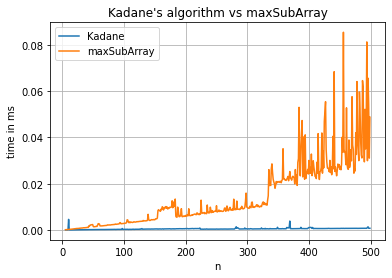

In [7]:
x = []
y = []

x2 = []
y2 = []

for n in range(5,500):
    a = random.sample(range(1, 1000), n)
    t = repeat(setup="from __main__ import kadane", stmt=f"kadane({a}, {n})", repeat=1, number=10)
    x.append(n)
    y.append(t)

for n2 in range(5,500):
    a2 = random.sample(range(1, 1000), n2)
    t2 = repeat(setup="from __main__ import maxSubArray, maxSubArrayMid", stmt=f"maxSubArray({a2}, {0}, {len(a2)})", repeat=1, number=10)
    x2.append(n2)
    y2.append(t2)

plt.plot(x, y)
plt.plot(x2, y2)
plt.legend(["Kadane", "maxSubArray", "n log(n)"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.title("Kadane's algorithm vs maxSubArray")

plt.grid()
plt.show()

Como se puede notar en los gráficos, el algoritmo de Kadane es constantemente más eficiente que la implementación _maxSubArray_. Sin embargo, a veces, para algunos $n$, Kadane muestra subidas drásticas en su tiempo de ejecución. De igual manera, _maxSubArray_ muestra el mismo comportamiento para varios $n$ distintos.